# 사전세팅

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.6/871.6 kB 13.4 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [3]:
from ultralytics import YOLO

In [4]:
from IPython.display import display, Image
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
import shutil
from google.colab import files

# Roboflow 코드

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="(your api key)")
project = rf.workspace("ballon-map-workspace").project("trash_balloon_detection_yolo")
version = project.version(1)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Trash_Balloon_Detection_YOLO-1 in yolov5pytorch:: 100%|██████████| 2470/2470 [00:00<00:00, 3633.73it/s]


In [8]:
# YOLOv5 PyTorch는 PyTorch를 기반으로 구현된 YOLOv5 프레임워크 자체를 말함
# yolov5l은 YOLOv5 프레임워크에서 제공하는 여러 모델 중 하나
# YOLOv5 모델은 크기에 따라 몇 가지 변형이 있는데, 그중 yolov5l은 Large (L) 버전
# yolov5l은 파라미터 수와 연산량이 더 크기 때문에 더 높은 정확도를 제공할 수 있지만, 더 많은 자원이 필요
# yolov5m 이라고하는 밸런스 맞춰진 모델을 기반으로 학습 진행
# 근데 얘가 yolov5mu가 더 좋다면서 이걸로 해주네? 일단 OK
!yolo task=detect mode=train model=yolov5m.pt data=/content/Trash_Balloon_Detection_YOLO-1/data.yaml epochs=50 imgsz=640 plots=True

PRO TIP 💡 Replace 'model=yolov5m.pt' with new 'model=yolov5mu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5m.pt, data=/content/Trash_Balloon_Detection_YOLO-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=Fals

# 훈련 결과 출력

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# 현재 작업디렉토리 확인
import os
HOME = os.getcwd()
print(HOME)

/content


/content


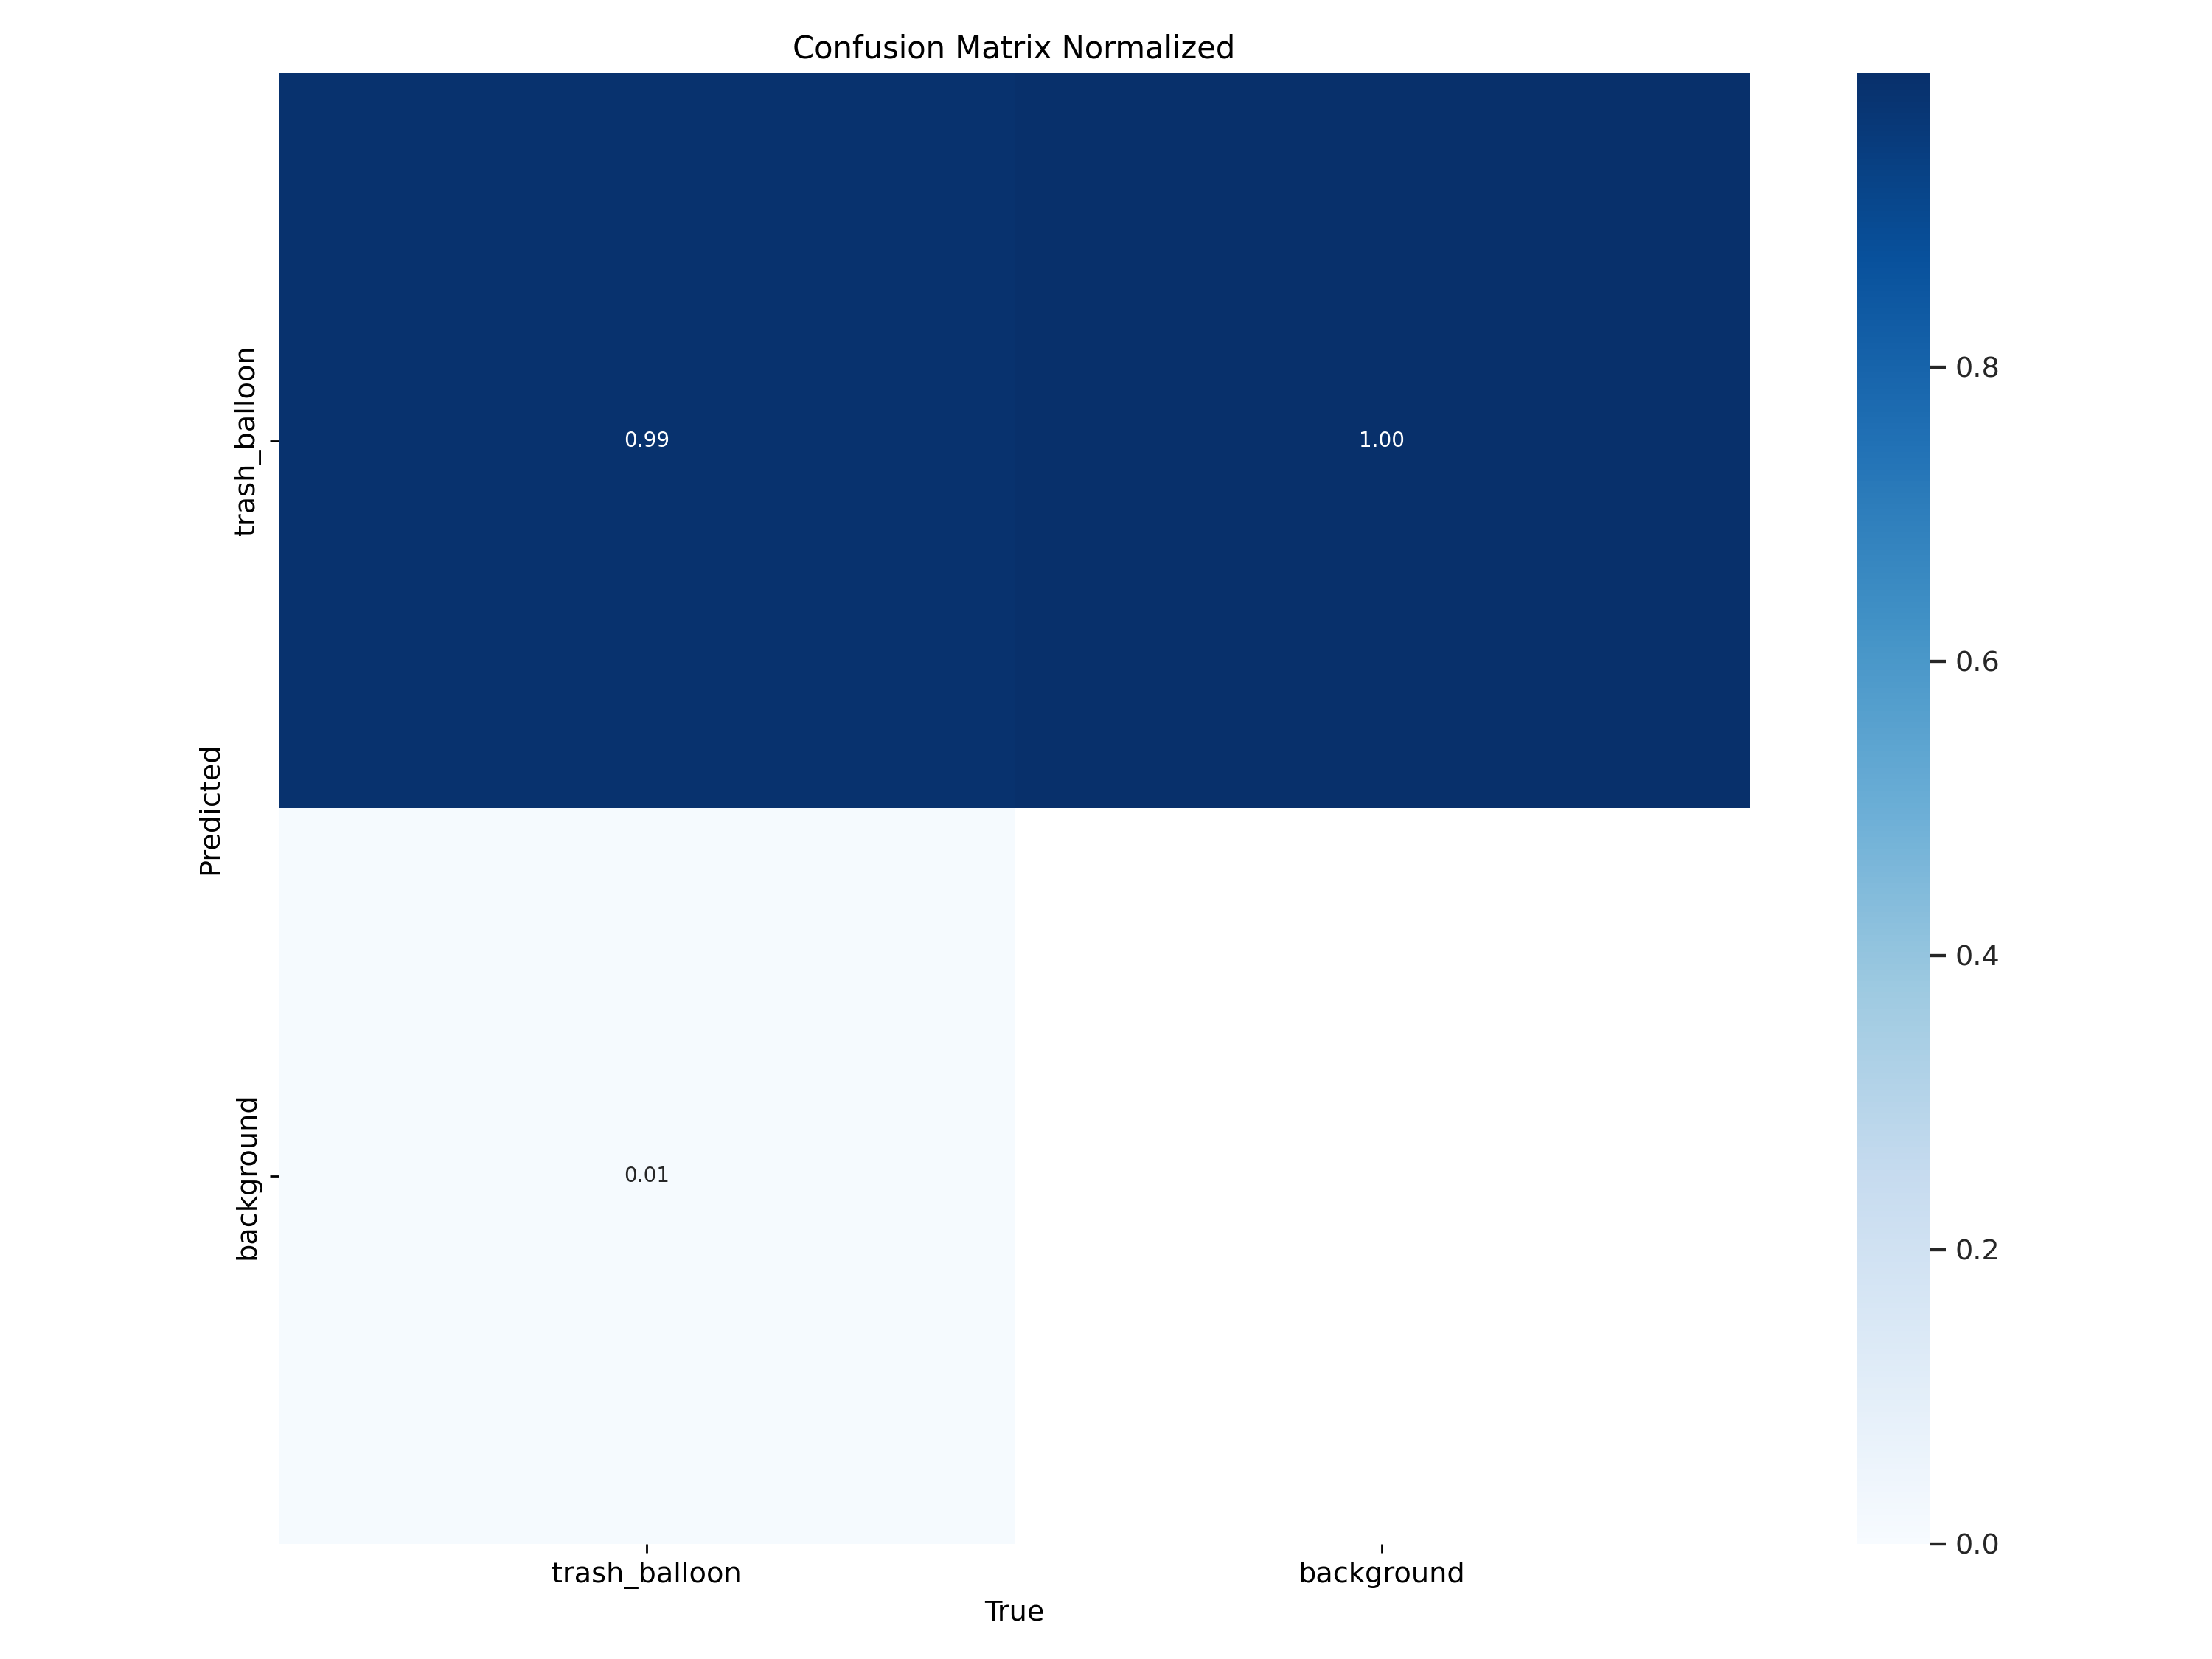

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix_normalized.png', width=1000)

/content


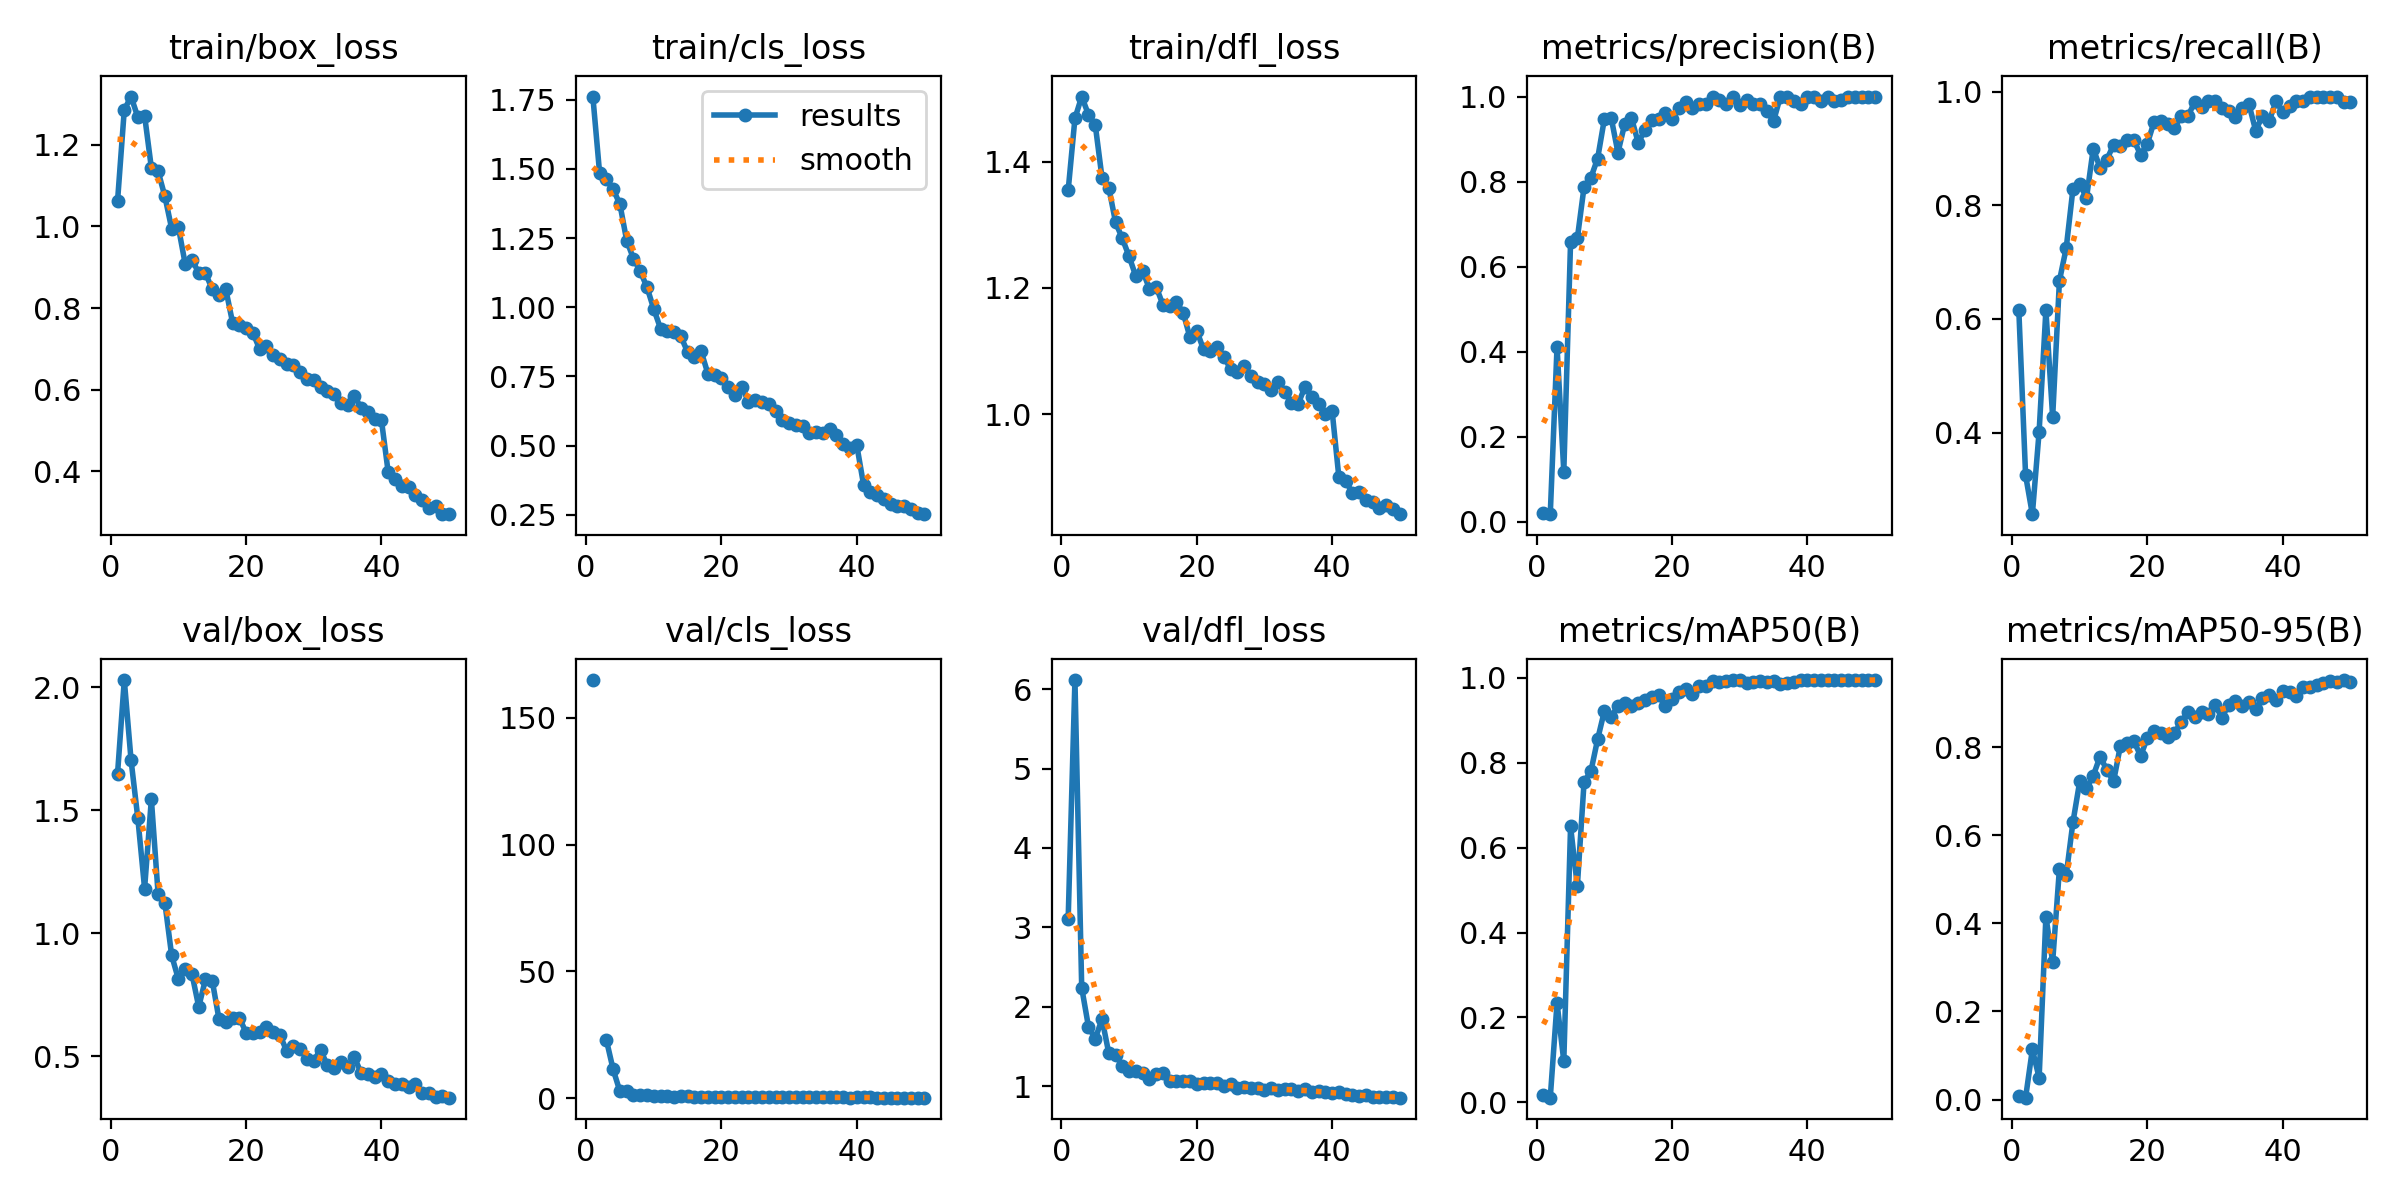

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=1000)

/content


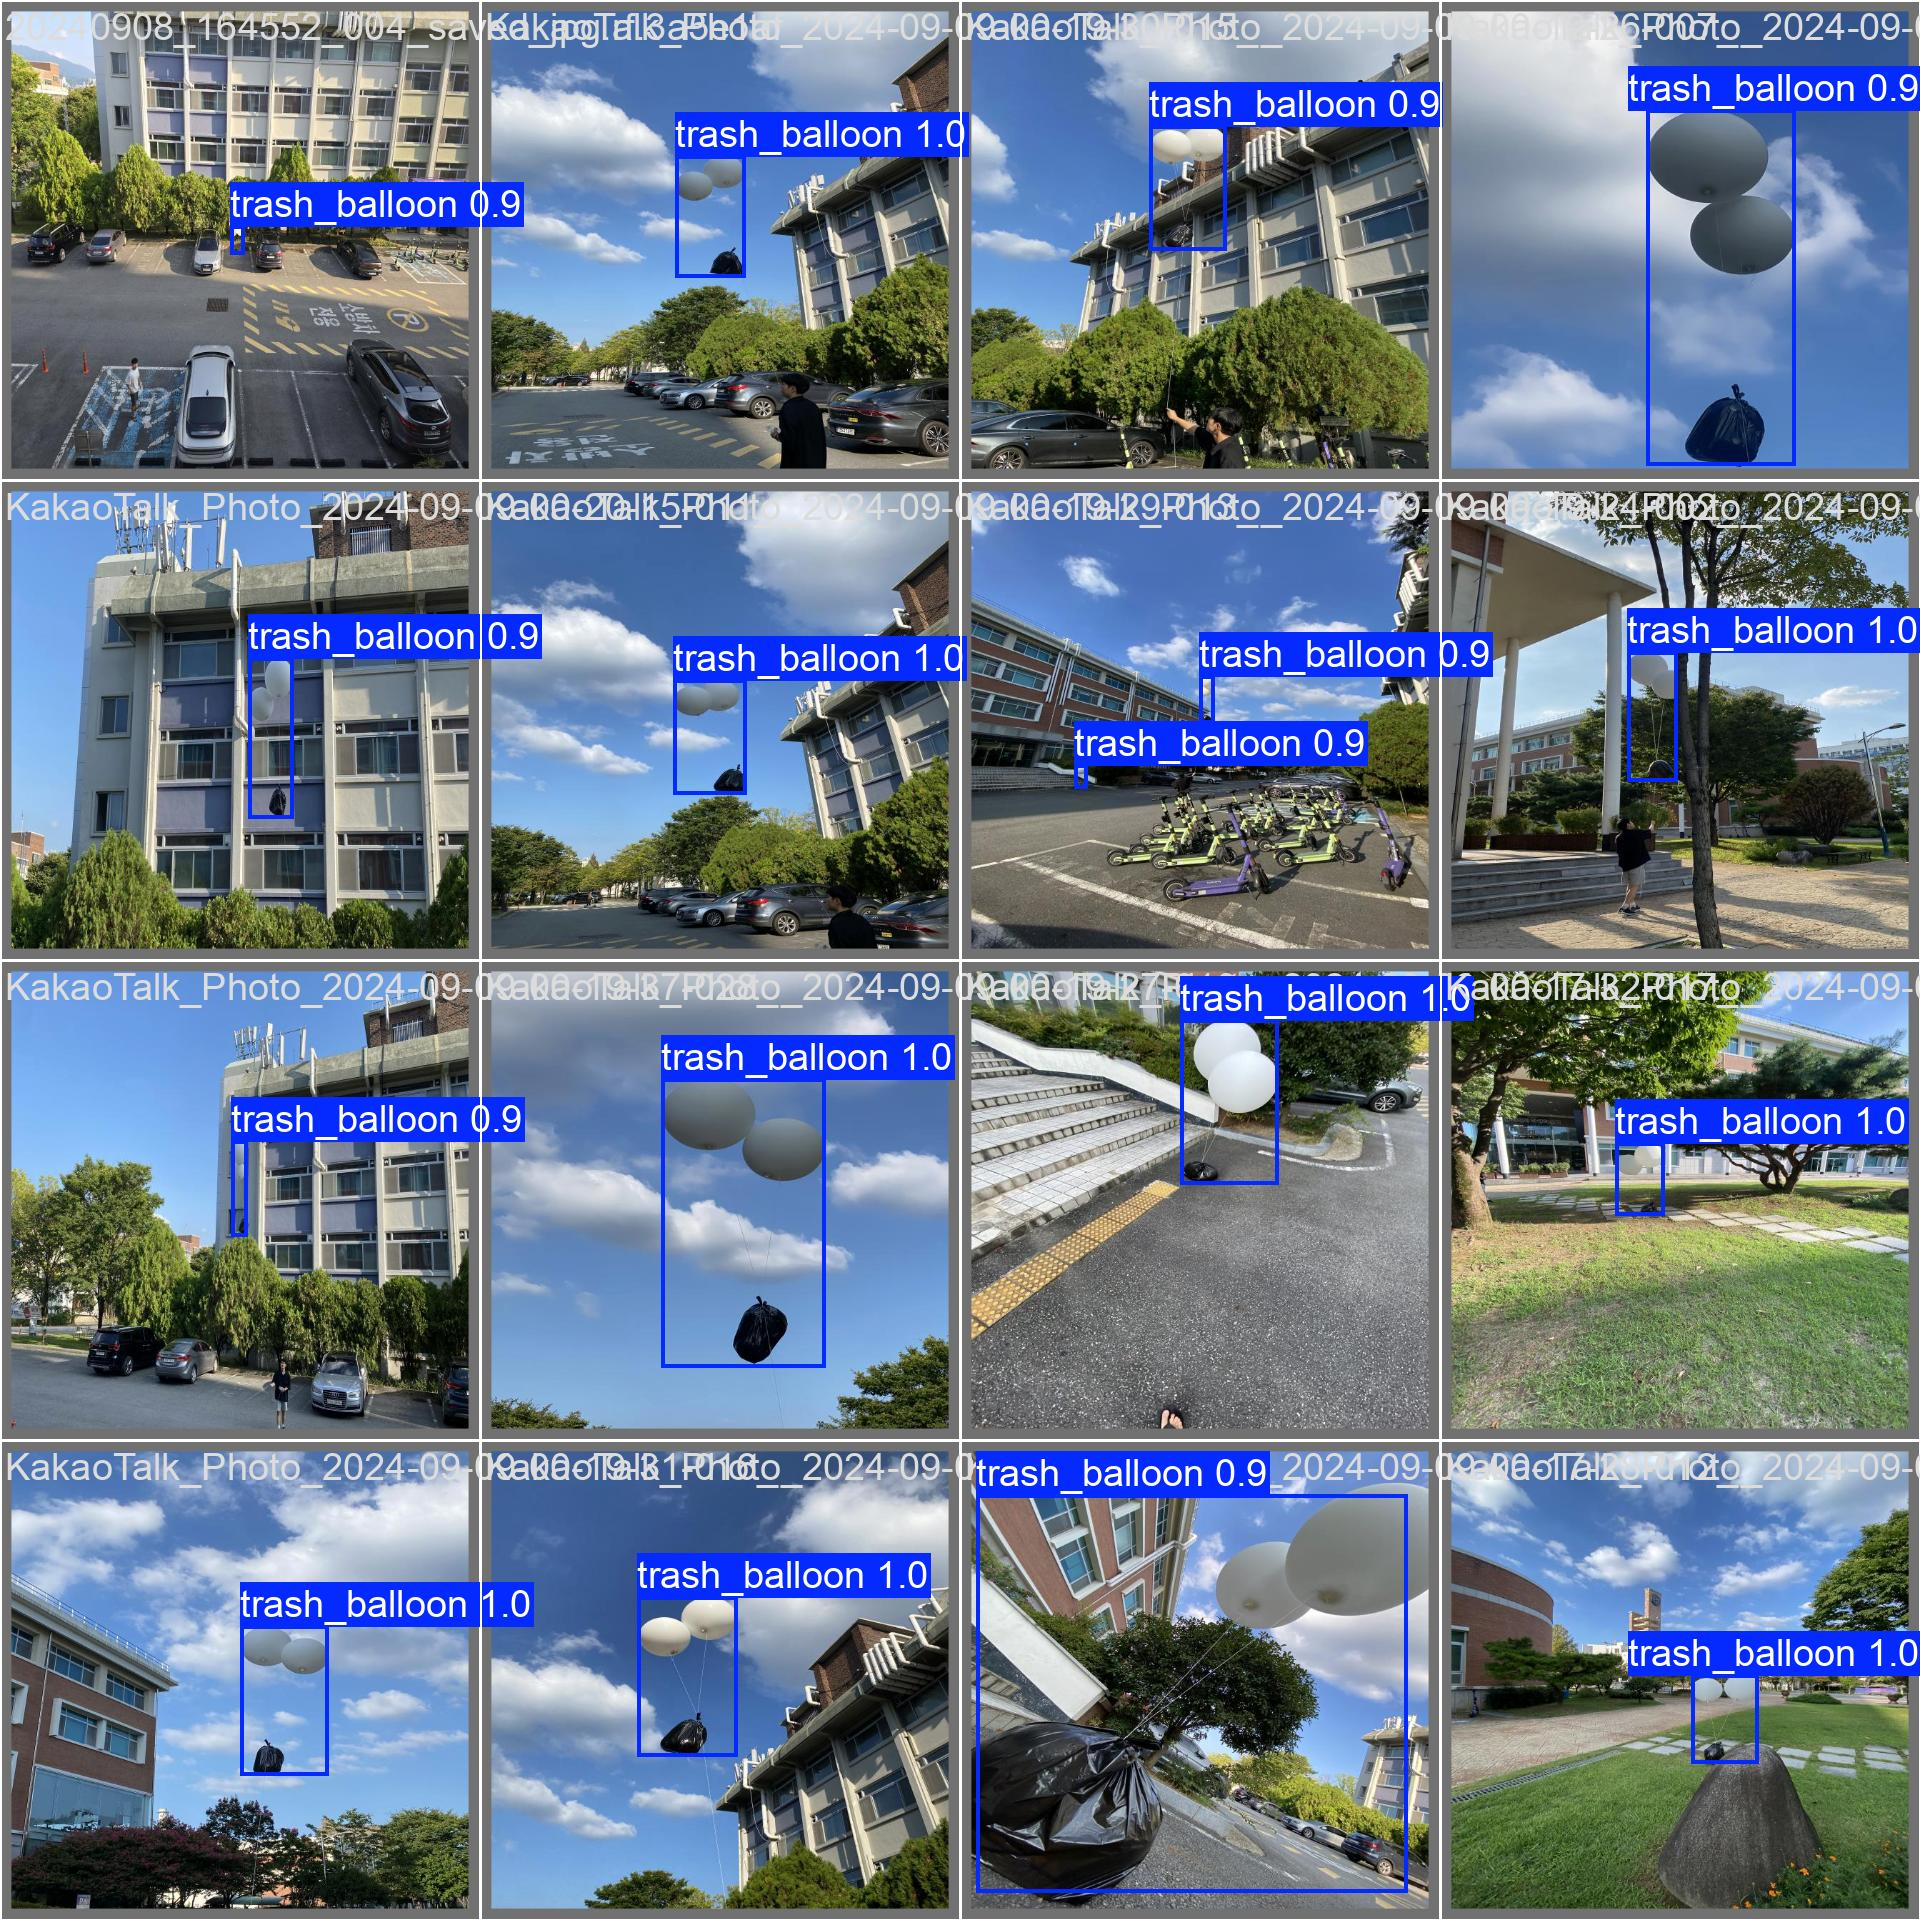

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600) # 검증 데이터셋 예측

/content


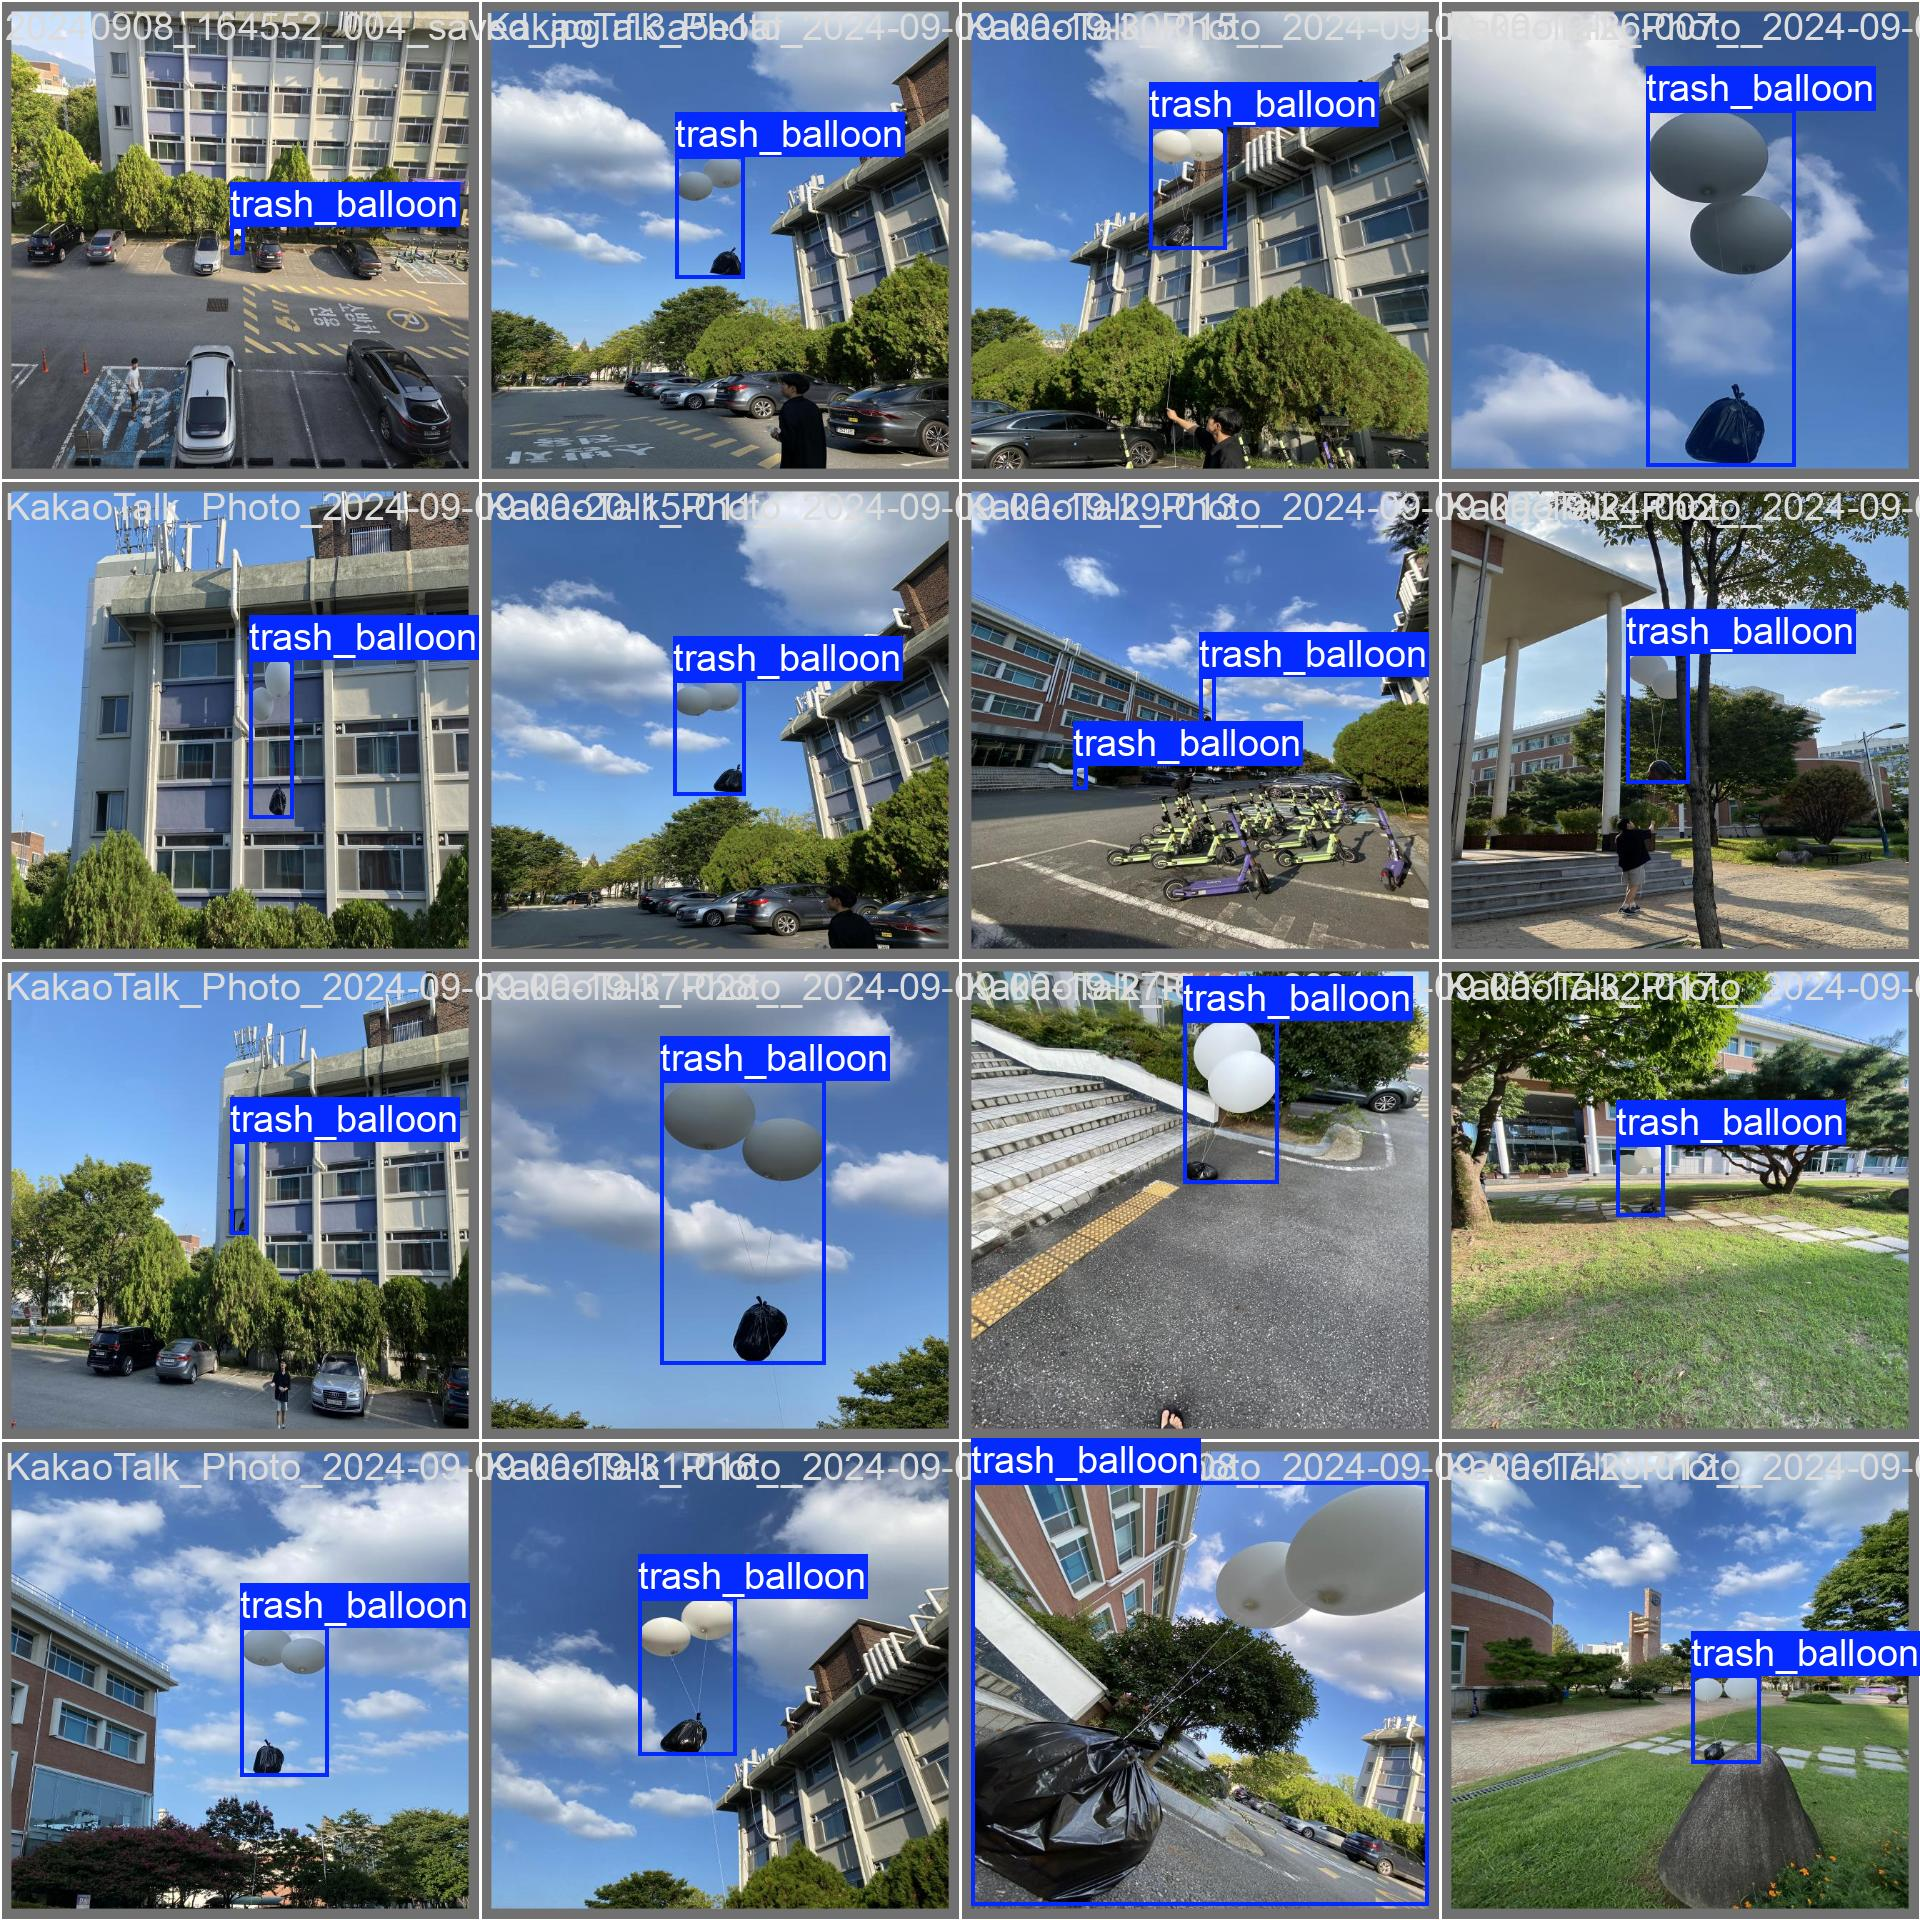

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_labels.jpg', width=600) # 검증 데이터셋 실제 라벨(데이터)

# 커스텀 모델 테스트

In [17]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source=/content/Trash_Balloon_Detection_YOLO-1/test/images save=True

/content
Ultralytics YOLOv8.2.93 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5m summary (fused): 248 layers, 25,045,795 parameters, 0 gradients, 64.0 GFLOPs

image 1/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/-7-4-CCTV-_jpg.rf.dbe5e70f4412a9a153d2b0a214e58a1d.jpg: 640x640 1 trash_balloon, 32.7ms
image 2/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_164426-2-_jpg.rf.a3c526fb3280df22d9ed0ed3f7424592.jpg: 640x640 1 trash_balloon, 32.8ms
image 3/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_164535-1-_jpg.rf.d3a6823175aea0db122c9c07ec333e51.jpg: 640x640 1 trash_balloon, 32.7ms
image 4/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_170358_017_saved_jpg.rf.6121f8b7766f4e79b4648ae1f5c37db0.jpg: 640x640 1 trash_balloon, 32.7ms
image 5/112 /content/Trash_Balloon_Detection_YOLO-1/test/images/20240908_170410_004_saved_jpg.rf.a6aaba5019e656cf72c1d03fa217db24.jpg: 640x640 1 trash_balloon, 32.7ms
image 6/112 

In [18]:
# 이미지 경로 리스트 불러오기
image_paths = glob.glob(f'{HOME}/runs/detect/predict/*.jpg')

In [19]:
# 한 행에 출력할 이미지 수
num_images_per_row = 4

# 총 이미지 개수
num_images = len(image_paths)

# 이미지 출력 (한 행에 4개씩)
for i in range(0, num_images, num_images_per_row):
    # 각 행에 해당하는 이미지 경로
    row_images = image_paths[i:i + num_images_per_row]

    # 한 행에 4개씩 플롯 생성
    fig, axes = plt.subplots(1, len(row_images), figsize=(20, 20))

    for ax, image_path in zip(axes, row_images):
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.axis('off')  # 축 숨기기

    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# 커스텀 모델 훈련 관련 폴더 runs 폴더 저장 및 이미지 & 어노테이션 데이터 저장

In [20]:
# runs 폴더 압축하기
shutil.make_archive('runs', 'zip', 'runs')

'/content/runs.zip'

In [21]:
# Trash_Balloon_Detection-1 폴더 압축하기
shutil.make_archive('Trash_Balloon_Detection-1', 'zip', 'Trash_Balloon_Detection-1')

'/content/Trash_Balloon_Detection-1.zip'

In [22]:
# 파일 다운로드
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 파일 다운로드
# 참고 : 이 파일은 그냥 따로 직접 다운받는게 좋음
files.download('Trash_Balloon_Detection-1.zip')